<img src="https://www.qmul.ac.uk/maths/media/maths/CSN-900x300.jpg">

# IIND-4311 Estructuración de Redes Sociales 
## Fundamentos en estudio de redes sociales


#  Medidas de centralidad y prestigio

### Profesor: Felipe Montes

In [1]:
# Librerias que vamos a usar
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Importemos la red de Claudia Lopez para nuestra clase

In [2]:
# Nodos y arcos de la red
nodos = pd.read_csv('Nodos CL.csv', sep=',')
arcos = pd.read_csv('Arcos CL.csv', sep=',')

In [3]:
# Limpiemos las bases
nodos = nodos.drop(columns=['timeset'])
arcos = arcos.drop(columns=['Label','timeset','Id'])

In [4]:
nodos.head()

,Id,Label,username,category,post_activity,fan_count,talking_about_count,users_can_post,link
0,158190387560587,Claudia López,ClaudiaLopezCL,Public Figure,0.58,553278,68339,yes,https://www.facebook.com/ClaudiaLopezCL/
1,214920142051670,Alonso Salazar,AlonsoSalazarJ,Public Figure,0.00,30408,12,yes,https://www.facebook.com/AlonsoSalazarJ/
2,155088471199849,Senado Colombia,senadogovco,Government Organization,0.09,39062,235,no,https://www.facebook.com/senadogovco/
3,1524779097779678,Curso Tendencias en Innovación Política,NaN,School,0.00,1210,3,yes,https://www.facebook.com/Curso-Tendencias-en-I...
4,225695683920,Iván Cepeda Castro,IvanCepedaCamara,Politician,0.14,154848,8322,yes,https://www.facebook.com/IvanCepedaCamara/


In [5]:
arcos.head()

,Source,Target,Type,Weight
0,158190387560587,214920142051670,Directed,1
1,158190387560587,155088471199849,Directed,1
2,158190387560587,1524779097779678,Directed,1
3,158190387560587,225695683920,Directed,1
4,158190387560587,126450910743068,Directed,1


Creemos la red

In [7]:
# La red vacia
G = nx.DiGraph()

#Adicionar los nodos y sus atributos a la red
for i in range(len(nodos['Id'])):   
    G.add_node(nodos['Id'][i])
    for j in nodos:
        if j!= 'Id':
            G.nodes[nodos['Id'][i]][j]=nodos[j][i]
            
            
# Adicionar los arcos de la red
for i in range(len(arcos['Source'])):
    G.add_edge(arcos['Source'][i],arcos['Target'][i])   


In [17]:
a = []
for n in G.nodes():
    a.append(G.degree(n))
np.mean(a)

8.59620596205962

Por último visualicemos la red

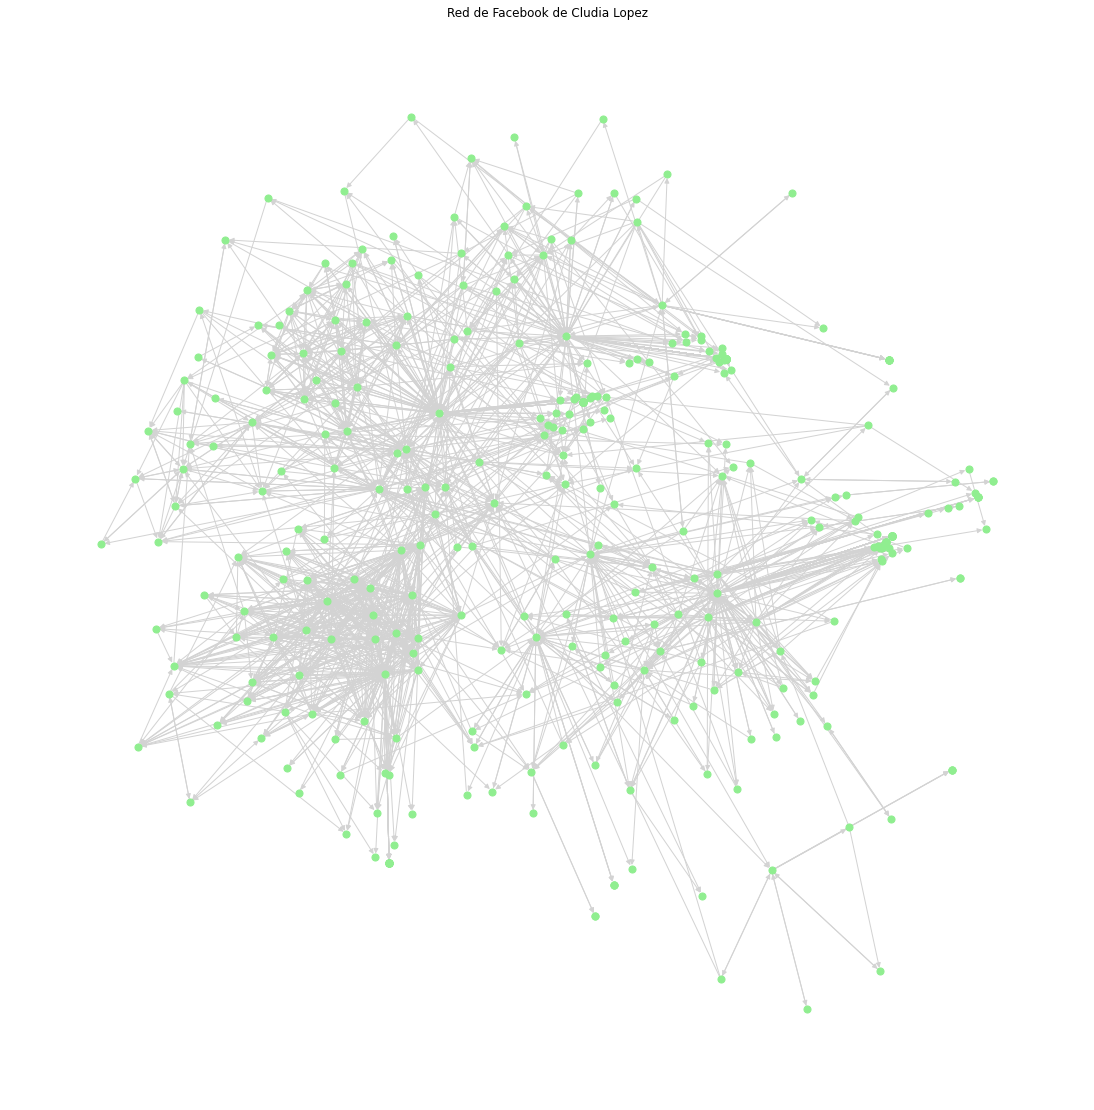

In [8]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))

# Después se genera el gráfico
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')

plt.title('Red de Facebook de Cludia Lopez')
# Por último se muestra la gráfica
plt.show()

In [12]:
# Probemos algunos conceptos básicos
print('El número de nodos es', G.number_of_nodes())
print('El número de arcos es', G.number_of_edges())
vecinos=G.neighbors(193631447514110)
print('Los vecinos de', G.nodes[193631447514110]['Label'], "son:", ", ".join([G.nodes[i]['Label'] for i in vecinos]))

El número de nodos es 369
El número de arcos es 1586
Los vecinos de Enrique Peñalosa son: Alcaldía Mayor de Bogotá, Jorge Torres Concejal, Antanas Mockus, Revista Semana, El Espectador, Marta Lucía, PIRRY, El Tiempo, James Rodriguez, Mauricio Macri, Hosman Martínez, Diego Laserna, Olga Lucia Serrano, Concejal Lucia Bastidas, Rosaristas con Peñalosa #Podemos, Externadistas con Peñalosa, Uniandinos con Peñalosa #Podemos, Javerianos con Peñalosa #Podemos, Carlos Galán, David Luna, Equipo Por Bogotá, RCN La Radio


**Reto 1:** Obtengan la distribución del grado

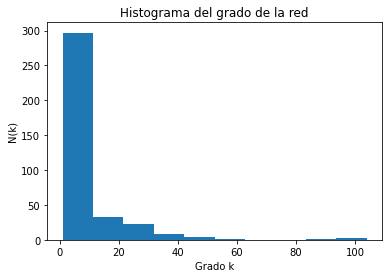

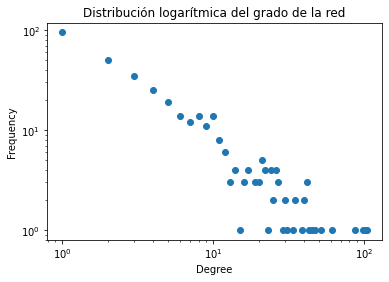

In [18]:
#Distrucion del grado
grado=[]
for node in G.nodes():
    grado.append(G.degree(node))
    
# Realizar el histograma
a=plt.hist(grado)
plt.title('Histograma del grado de la red')
plt.xlabel ("Grado k")
plt.ylabel ("N(k)")
plt.show()

# Gráficar la distribución
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.loglog(degrees, degree_freq, 'o') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Distribución logarítmica del grado de la red')
plt.show()

**Reto 2:** ¿Cuál es el nodo más conectado?

In [19]:
dic_grados=G.degree()
mas_conectado=''
max_grado = 0
for i,values_i in dic_grados:
    if values_i > max_grado:
        max_grado=values_i
        mas_conectado=G.nodes[i]['Label']
        
print('El nodo más conectado es', mas_conectado, 'con un grado de', max_grado)

El nodo más conectado es Partido Alianza Verde con un grado de 104


In [ ]:
#Otra forma de hacerlo
sorted_deg =  sorted(dic_grados, key=lambda item: item[1], reverse=True)
print('El nodo más conectado es', G.nodes[sorted_deg[0][0]]['Label'], 'con un grado de', sorted_deg[0][1])

**Reto 3:** ¿Cuál es diámetro de la red?

Un grafo dirigido está débilmente conectado si, y solo si, el grafo está conectado cuando se ignora la dirección del borde entre los nodos.

In [20]:
# Verificar que el grafo esté bien conectado
nx.is_strongly_connected(G)

False

Esto significa que no es posible desde un nodo llegar a todos los nodos, dado que es una red dirigida y no es posible "devolverse" por un arco.

In [21]:
# Convirtamos el grafo en uno no dirigido
H = G.to_undirected()

In [22]:
# El grado está conectado
nx.is_connected(H)

True

El grafo si esta completamente conectado

In [23]:
# Por medio de las funciones de Networkx
nx.diameter(H)

4

##### Otra menera de hacerlo

In [24]:
# Computemos todo las distancias más cortas entre todos los nodos
path = dict(nx.all_pairs_shortest_path(H))

In [25]:
#Econtremos la distancia más larga
mayor_distancia=0
for i in H.nodes():
    for j in H.nodes():
        if i != j:
            if len(path[i][j]) > mayor_distancia:
                mayor_distancia=len(path[i][j])-1
                
print('El diametro de la red es', mayor_distancia)

El diametro de la red es 4


In [ ]:
# Distancia: Es el camino entre un par de nodos.
#• Distancia Geodésica: Es el camino más corto entre dos nodos.
#• Diámetro: Es la longitud de la distancia geodésica más larga entre cualquier par de nodos en la red

**Reto 4:** ¿Cuál es la densidad de la red?

In [1]:
#Densidad: Proporción del número de lazos presentes en la red sobre el número máximo posible

In [26]:
nx.density(G)

0.011679627665841876

No olvidar que esta es una red dirigida

In [ ]:
densidad=nx.number_of_edges(G)/(nx.number_of_nodes(G)*(nx.number_of_nodes(G)-1))
densidad

**Reto 5:** ¿Cuál es la reciprocidad de la red?

In [ ]:
#Reciprocidad: Proporción de lazos que son recíprocos en la red

In [27]:
nx.reciprocity(G)

0.32156368221941994

**Reto 6** Nodo con mayor Centralidad Eigenvector

In [ ]:
# Es una medida de centralidad que toma en cuenta también la importancia de sus vecinos

In [28]:
# Construyamos una función para extrael el mayor nodo de un diccionario
def mayorNodo(dic):
    mas=''
    maxi = 0
    for i in dic.keys():
        if dic[i] > maxi:
            maxi=dic[i]
            mas=G.nodes[i]['Label']
    nodo=[]
    nodo.append(mas)
    nodo.append(maxi)
    return nodo

In [29]:
mayorNodo(nx.eigenvector_centrality(G))

['CICLOPASEOS DE LOS MIERCOLES', 0.26206702045349417]

**Reto 7** Nodo con mayor PageRank

In [ ]:
#Algoritmo de google
#A cada página web se le asigna un número en función del número de 
#enlaces de otras páginas que la apuntan, el valor de esas páginas y otros criterios no públicos

In [30]:
mayorNodo(nx.pagerank(G))

['El Tiempo', 0.022920772951993476]

**Reto 8** Nodo con mayor Betweenness

In [ ]:
#Frecuencia con la que un nodo aparece en el camino más corto entre todos los pares de nodos de la red

In [31]:
mayorNodo(nx.betweenness_centrality(G))

['Partido Alianza Verde', 0.14862699372955634]

In [32]:
## Ahora estadarizado para tener un valor entre 0 y 1, entre más cerca a uno mayor betweenness
mn=min(nx.betweenness_centrality(G).values())
mx=max(nx.betweenness_centrality(G).values())
bc=nx.betweenness_centrality(G)

for i in G.nodes():
    G.nodes[i]['Standard-Betweenness']=(float(bc[i])-mn)/(mx-mn)

In [33]:
mayorNodo(nx.get_node_attributes(G,'Standard-Betweenness'))

['Partido Alianza Verde', 1.0]

**Reto 9** Nodo con quinto mayor Closeness

In [ ]:
#La distancia media de un nodo inicial a los demás nodos de la red

In [ ]:
closeness=nx.closeness_centrality(G)
sort_closeness=sorted(closeness.items(), key=lambda x: x[1], reverse=True)
print('El quinto nodo mayor cercanía es', G.nodes[sort_closeness[4][0]]['Label'], 'con un closeness de', sort_closeness[4][1])

**Reto 10** ¿Cuál es el clustering del subgrafo formado por solo las figuras públicas?

In [ ]:
#Transitividad : Cuando dos nodos que conocen a un tercero se conocen entre ello. Se mide como clustering
#Alta transitividad cuando un nodo conecta como puente a grupos diferentes. Hay transitividad para cada nodo o el promedio de la red

In [ ]:
# Identificamos las figuras públicas
figuras_publicas=[]
category=nx.get_node_attributes(G,'category')
for i in category.keys():
    if category[i] == 'Public Figure':
        figuras_publicas.append(i)

In [ ]:
# Creamos un sub grafo a partir de la red completa
PF = G.subgraph(figuras_publicas)
nx.average_clustering(PF)

Por curiosidad grafiquemos la red de las figuras públicas

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(PF, node_size=50, node_color='lightblue', edge_color='lightgray', labels=nx.get_node_attributes(PF, 'Label'))
plt.title('Red de Figuras Públicas')
plt.show()

**Reto 11** Cualcular la asortatividad de la red

In [ ]:
#Mide la correlación de las características de los nodos en la red frente a sus conexiones

In [ ]:
nx.degree_assortativity_coefficient(G)